# Using CGPA and IQ of a students, predict whether he/she can have placement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [4]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

# steps to do :
1. Preprocess  + EDA + Feature selection
2. Extract Input and Output column
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate model / Model selection
7. Deploy the model

In [5]:
# drop unnamed column:
df.drop(df.iloc[:,:1], inplace = True, axis=1)

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


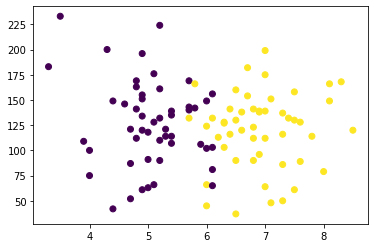

In [7]:
plt.scatter(df.cgpa, df.iq, c=df.placement)

In [8]:
# x train
X = df.iloc[:,0:2]

# y train
y = df.iloc[:,-1]

In [9]:
X.shape

(100, 2)

In [10]:
y.shape

(100,)

In [11]:
# train test split:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.1)

In [12]:
X_train

,cgpa,iq
33,6.0,149.0
40,4.9,134.0
16,5.2,224.0
58,8.0,79.0
54,6.4,141.0
...,...,...
50,3.5,233.0
17,3.3,183.0
91,7.5,158.0
45,6.0,66.0


In [13]:
y_train

33    0
40    0
16    0
58    1
54    1
     ..
50    0
17    0
91    1
45    1
35    1
Name: placement, Length: 90, dtype: int64

In [14]:
X_test

,cgpa,iq
25,5.0,91.0
6,5.7,143.0
68,4.0,75.0
28,5.2,90.0
4,5.8,142.0
65,8.1,166.0
93,6.8,112.0
80,4.9,196.0
90,7.3,86.0
70,6.3,127.0


In [15]:
# scaling x_train:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.        ,  0.63313551],
       [-0.97025257,  0.25825264],
       [-0.70563823,  2.50754985],
       [ 1.76409557, -1.11631787],
       [ 0.35281911,  0.43319798],
       [-1.41127646,  0.63313551],
       [-0.88204779, -0.14162242],
       [-1.85230035, -0.36655214],
       [-1.05845734,  0.43319798],
       [ 1.32307168, -1.56617731],
       [-0.26461434,  0.20826826],
       [ 2.20511947, -0.09163803],
       [ 0.97025257, -1.8910758 ],
       [-0.88204779, -1.51619293],
       [-1.76409557, -0.59148186],
       [ 0.61743345,  0.75809647],
       [-0.97025257, -1.56617731],
       [ 0.44102389,  0.15828388],
       [-1.14666212, -1.79110703],
       [ 0.08820478,  0.80808085],
       [-1.2348669 ,  0.55815894],
       [-0.97025257,  0.78308866],
       [-0.79384301,  1.30792467],
       [ 0.44102389, -0.84140377],
       [-0.70563823, -0.34155995],
       [-0.52922867,  0.28324483],
       [ 0.70563823,  0.43319798],
       [ 0.        ,  0.00833073],
       [ 0.79384301,

In [16]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.77664391, -0.85412304],
       [-0.17922552,  0.54255615],
       [-1.63009875, -1.28387049],
       [-0.60595294, -0.88098226],
       [-0.09388003,  0.51569693],
       [ 1.86906611,  1.1603181 ],
       [ 0.75957481, -0.29007952],
       [-0.86198939,  1.96609455],
       [ 1.18630223, -0.98841912],
       [ 0.33284739,  0.1128087 ]])

In [17]:
# train the model. [Using Logistic Regression classifier]
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [18]:
# evaluate model (get accuracy)
y_pred = clf.predict(X_test)

In [19]:
y_test

25    0
6     0
68    0
28    0
4     0
65    1
93    1
80    0
90    1
70    1
Name: placement, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


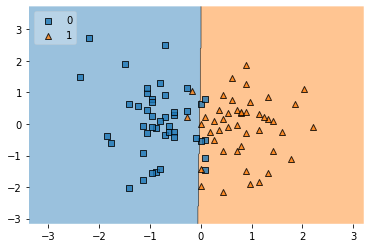

In [21]:
# Descision tree, you can visualize the pattern of your ML model
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [22]:
# this will help you to convert an object into a file and can use this anywhere.
import pickle
pickle.dump(clf, open('model.pkl','wb'))